In [2]:
import matplotlib.pyplot as plt
import torch
import pandas as pd

/Midgard/home/martinig/miniconda3/envs/thesis-src/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
def sort_similarities(similarities):
    # Sorts from most similar to toxic words to least similar	
    return {k: v for k, v in sorted(similarities.items(), key=lambda item: item[1], reverse=True)}

# dataset_name = "jigsaw"
dataset_name = "paradetox"
lexicons = ["abusive", "hate", "ngram-refined", "toxic"] 
strategies = ["top-1", "top-3", "top-5", "top-7", "top-9"]
dataset_dir = f"/Midgard/home/martinig/thesis-src/data/{dataset_name}"
# dataset_dir = f"/home/martin/Documents/Education/Master/thesis/project/thesis-src/data/{dataset_name}"

all_similarities = {}
for lexicon in lexicons:
    all_similarities[lexicon] = {}
    for sim_strategy in strategies:
        similarity_f = f'{dataset_dir}/word_embeddings/similarities/{lexicon}_{sim_strategy}.pt'
        similarities = torch.load(similarity_f)
        for k,v in similarities.items():
            if all_similarities[lexicon].get(k, None):
                all_similarities[lexicon][k].update({sim_strategy: v})
            else:
                all_similarities[lexicon][k] = {sim_strategy: v}
            


In [5]:
# get the values from the dictionary
dfs_by_lexicon = {}
for k,v in all_similarities.items():
	df = pd.DataFrame(v.items(), columns=['word', 'similarity'])
	df = pd.concat([df.drop(['similarity'], axis=1), df['similarity'].apply(pd.Series)], axis=1)
	dfs_by_lexicon[k] = df

for k,v in dfs_by_lexicon.items():
	print(f"##### {k} #####")
	print(v.head())

##### abusive #####
          word     top-1     top-3     top-5     top-7     top-9
0               0.000000  0.000000  0.000000  0.000000  0.000000
1  Zucker,were  0.590465  0.570394  0.553678  0.543449  0.536842
2       habbit  0.335974  0.329736  0.325987  0.321882  0.318560
3     michelle  0.504883  0.364993  0.334563  0.317973  0.307778
4      beside!  0.473438  0.465162  0.441030  0.409949  0.387628
##### hate #####
     word     top-1     top-3     top-5     top-7     top-9
0          0.000000  0.000000  0.000000  0.000000  0.000000
1      2b  0.602708  0.578230  0.564592  0.552234  0.543613
2    fun?  0.258990  0.252067  0.248674  0.245455  0.243115
3    out?  0.640833  0.398241  0.343460  0.317830  0.301966
4  murder  0.307354  0.298272  0.294914  0.291585  0.289240
##### ngram-refined #####
       word     top-1     top-3     top-5     top-7     top-9
0            0.000000  0.000000  0.000000  0.000000  0.000000
1    Ashley  0.236511  0.210906  0.201519  0.195581  0.190326
2

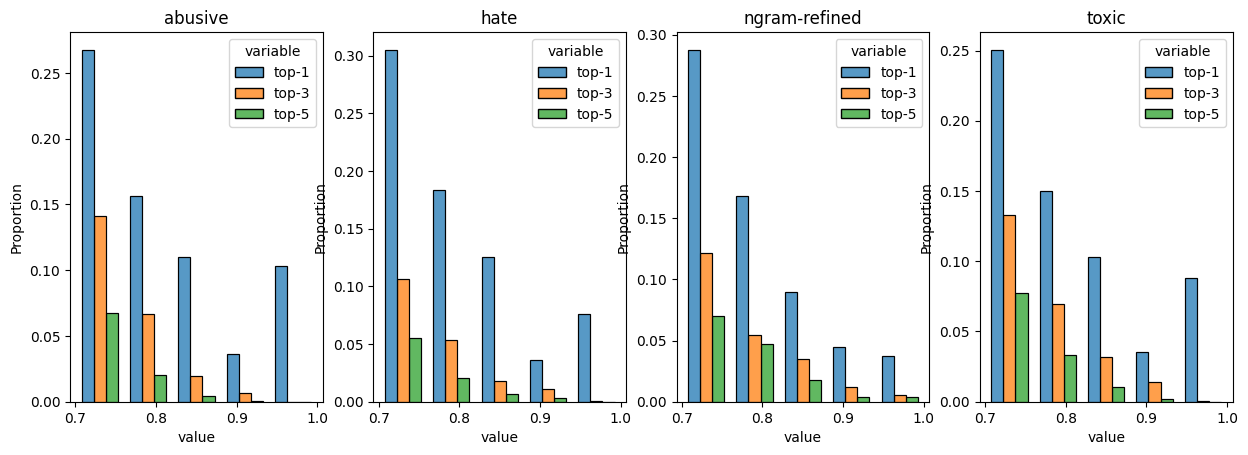

In [19]:
import seaborn as sns

# df.hist()
fig, axs = plt.subplots(ncols=4)
fig.set_figwidth(15)
for idx, (lexicon, df) in enumerate(dfs_by_lexicon.items()):
    df_filtered = df[df.columns[1:]].melt()
    df_filtered = df_filtered[df_filtered['value'] > 0.7]
    sns.histplot(df_filtered, x='value', hue='variable',
                multiple='dodge', shrink=.75, bins=5, ax=axs[idx],
                stat='proportion', element='bars').set_title(lexicon)
    # sns.catplot(data=df_filtered, x="value", y="variable", kind="violin", ax=axs[idx])

### JIGSAW

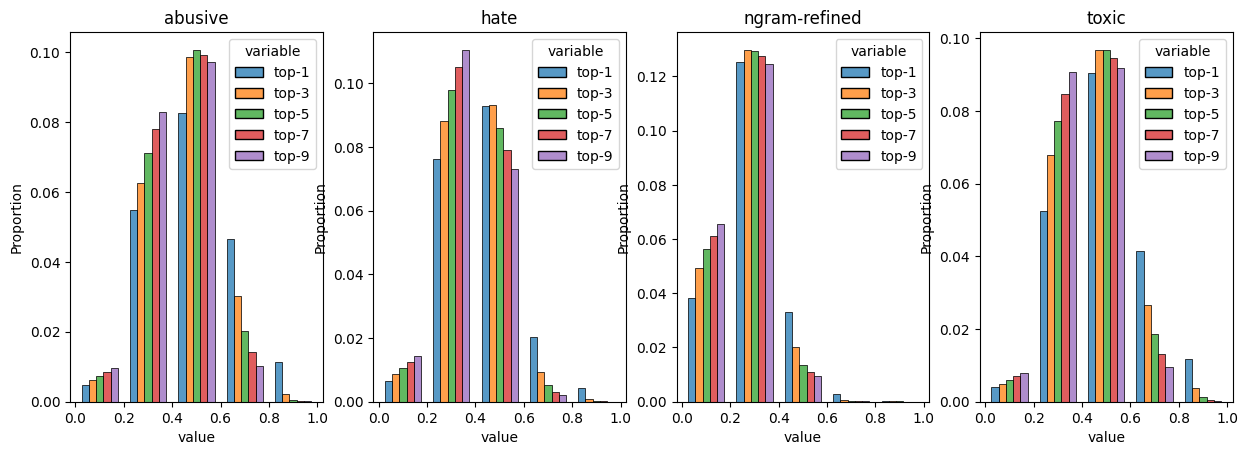

In [7]:
import seaborn as sns

# df.hist()
fig, axs = plt.subplots(ncols=4)
fig.set_figwidth(15)
for idx, (lexicon, df) in enumerate(dfs_by_lexicon.items()):
    df_filtered = df[df.columns[1:]].melt()
    # df_filtered = df_filtered[df_filtered['value'] > 0.7]
    sns.histplot(df_filtered, x='value', hue='variable',
                multiple='dodge', shrink=.75, bins=5, ax=axs[idx],
                stat='proportion', element='bars').set_title(lexicon)
    # sns.catplot(data=df_filtered, x="value", y="variable", kind="violin", ax=axs[idx])
### PARADETOX